# 描述

设计基于LeNet5的卷积神经网络对MINSI数据集进行训练和测试。

In [1]:
import numpy as np
from struct import unpack
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from cnn import *
from solver import Solver

# 将图和数据内联在notebook里
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

BATCH_SIZE=64
SHOW_ROWS=8
SHOW_COLS=8
# 图像显示函数
def show_images(images):
    for i in range(BATCH_SIZE):
        plt_idx=i+1
        plt.subplot(SHOW_ROWS, SHOW_COLS, plt_idx)
        idx=np.random.choice(a=np.size(images,0), size=1, replace=False, p=None)    
        plt.imshow(images[idx].reshape(28,28).astype('uint8')) 
        plt.axis('off')

    return 

%load_ext autoreload
%autoreload 2

## Dataset

使用MNIST数据集，它包含6万张训练图和1万张测试图。每张图片都包含一幅以白色数字为中心的图像，背景为黑色(0到9)。

In [2]:
def __read_image(path):
    with open(path, 'rb') as f:
        magic, num, rows, cols = unpack('>4I', f.read(16))
        img = np.fromfile(f, dtype=np.uint8).reshape(num, 784)
    return img

def __read_label(path):
    with open(path, 'rb') as f:
        magic, num = unpack('>2I', f.read(8))
        lab = np.fromfile(f, dtype=np.uint8)
    return lab
    
def load_mnist(image_path):
    train_image_path = os.path.join(image_path,'train-images-idx3-ubyte')
    train_label_path = os.path.join(image_path,'train-labels-idx1-ubyte')
    image = __read_image(train_image_path)
    label = __read_label(train_label_path)
    return image, label

(784,)


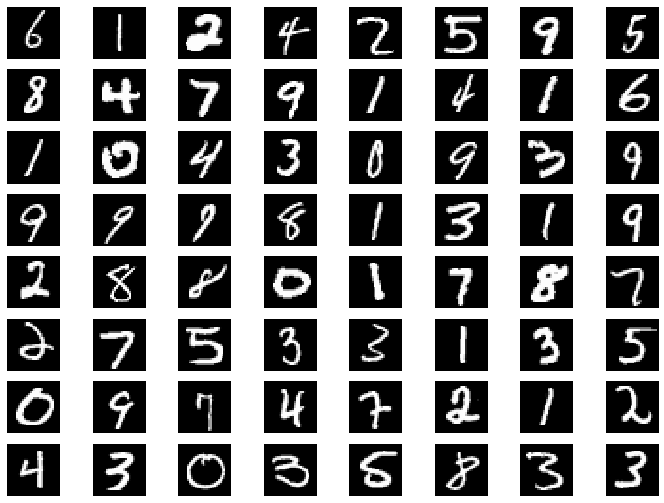

In [3]:
train_img, train_lab = load_mnist('./MNIST_data/MNIST/raw/')


print(train_img[0].shape)

show_images(train_img)

In [4]:
# 定义数据
NUM_TRAIN=1000
NUM_VAL=50
data={}
data['X_train']=train_img[0:NUM_TRAIN].reshape(NUM_TRAIN,28,28)[:,None]
data['y_train']=train_lab[0:NUM_TRAIN]
data['X_val']=train_img[NUM_TRAIN:NUM_TRAIN+NUM_VAL].reshape(NUM_VAL,28,28)[:,None]
data['y_val']=train_lab[NUM_TRAIN:NUM_TRAIN+NUM_VAL]


print(data['X_train'].shape)

print(data['y_train'].shape)


(1000, 1, 28, 28)
(1000,)


In [ ]:
model = VarLeNet(weight_scale=1e-2)

solver = Solver(model, data,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                lr_decay=1.0,
                num_epochs=15, 
                batch_size=100,
                num_train_samples=50,
                num_val_samples=50,
                verbose=True, print_every=1)
solver.train()

(Iteration 1 / 150) loss: 2.302557
(Epoch 0 / 15) train acc: 0.100000; val_acc: 0.120000
(Iteration 2 / 150) loss: 2.302308
(Iteration 3 / 150) loss: 2.292426
(Iteration 4 / 150) loss: 2.262630
(Iteration 5 / 150) loss: 2.286400
(Iteration 6 / 150) loss: 2.209920
(Iteration 7 / 150) loss: 2.099272
(Iteration 8 / 150) loss: 2.072890
(Iteration 9 / 150) loss: 1.881825


In [ ]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
